In [22]:
import pandas as pd
# Load the dataset with different encodings
file_path = 'C:\\Users\\devik\\Encriptx\Datasets\\IMDb India Movies\\IMDb Movies India.csv'
# Try reading with 'latin1' encoding
try:
    df = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    # If 'latin1' fails, try 'iso-8859-1'
    try:
        df = pd.read_csv(file_path, encoding='iso-8859-1')
    except UnicodeDecodeError:
        # If 'iso-8859-1' fails, try 'cp1252'
        df = pd.read_csv(file_path, encoding='cp1252')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [26]:


missing_values = df.isnull()

missing_counts = df.isnull().sum()

print("Counts of missing values:")
print(missing_counts)


Counts of missing values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [28]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


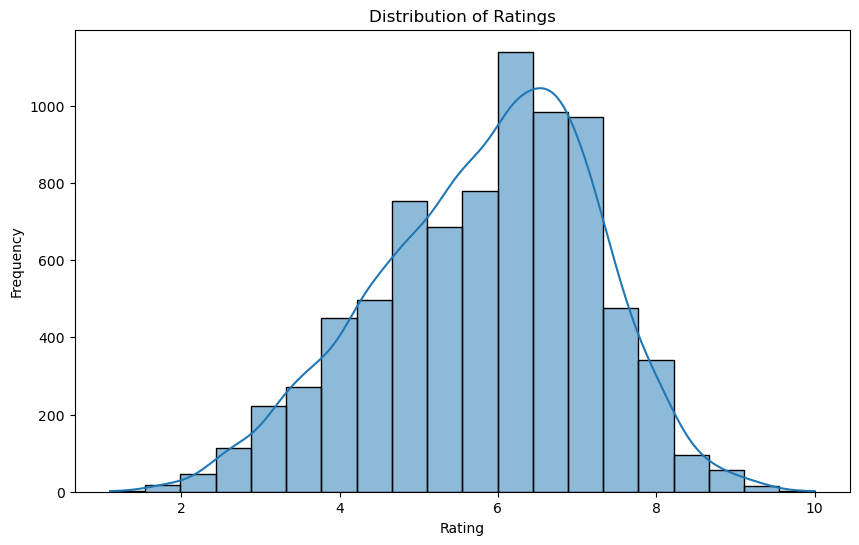

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


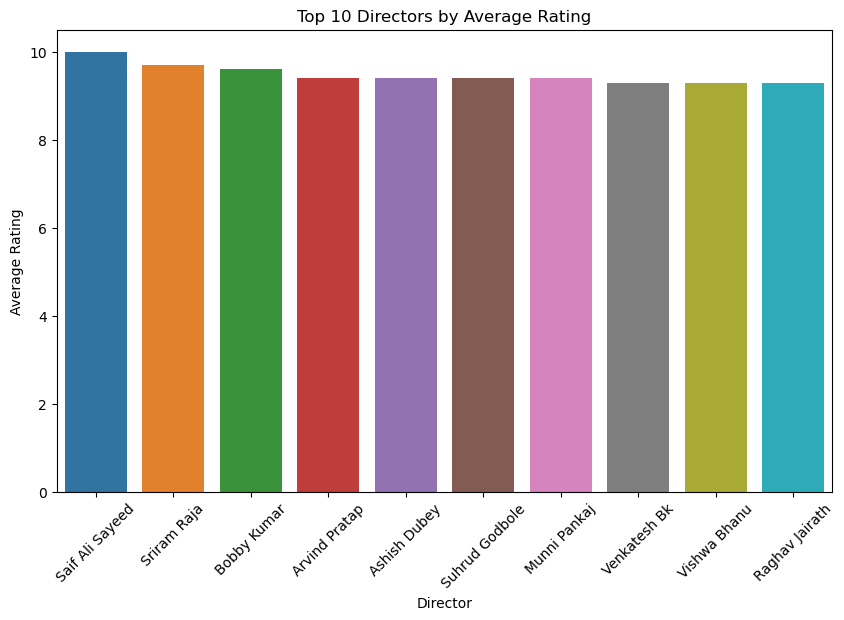

In [32]:
# Bar plot of top 10 Directors by average Rating
top_directors = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

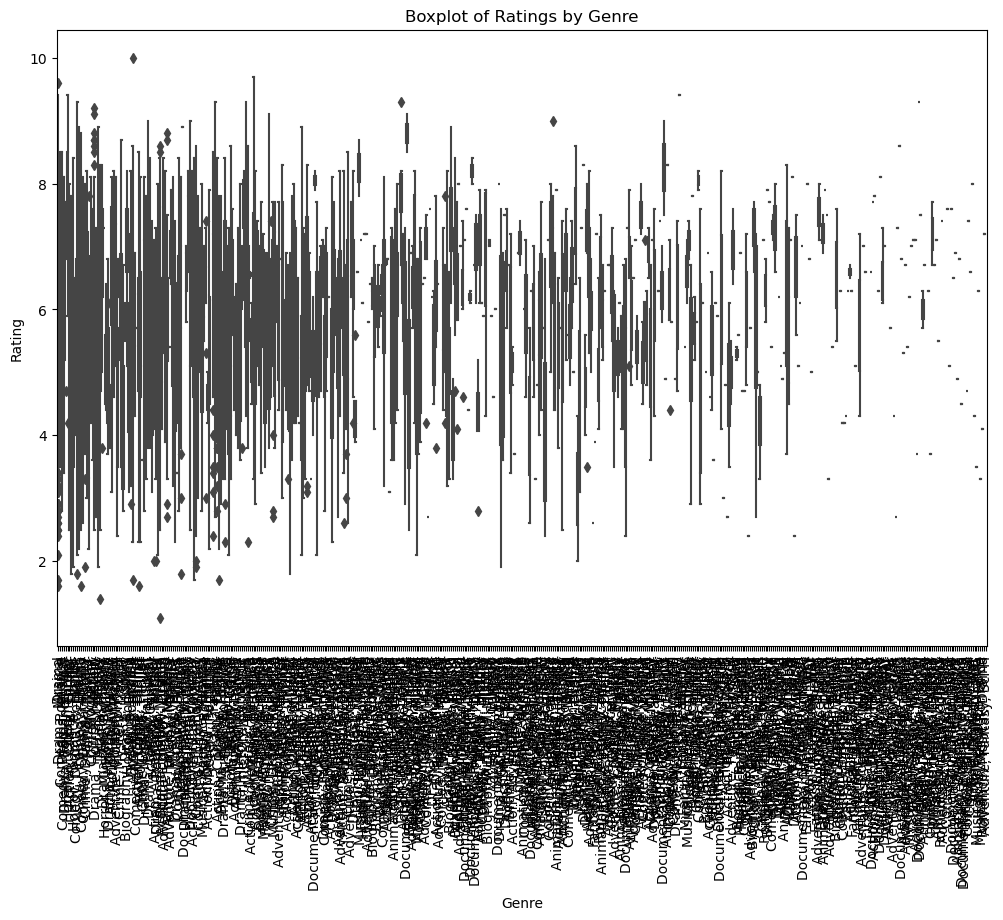

In [34]:
# Box plot of Rating vs Genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Rating', data=df)
plt.title('Boxplot of Ratings by Genre')
plt.xticks(rotation=90)
plt.show()

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = 'C:\\Users\\devik\\Encriptx\\Datasets\\IMDb India Movies\\IMDb Movies India.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Check for and handle missing values in 'Rating'
if df['Rating'].isnull().sum() > 0:
    median_rating = df['Rating'].median()
    df['Rating'].fillna(median_rating, inplace=True)

# Select relevant features
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for categorical variables
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps with model
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline with preprocessing and model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Predict ratings on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

new_movie = pd.DataFrame([['Comedy', 'Christopher Nolan', 'Christian Bale', 'Anne Hathaway', 'Michael Caine']],
                         columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

rating_prediction = model.predict(new_movie)
print(f"Predicted rating for the new movie: {rating_prediction[0]}")


Mean Squared Error: 3.480344589040964
Predicted rating for the new movie: 6.031571344477927
